2017-01-30 14:24:54 

The main goal here was to use Partial Least Squares Correlation (mean-centered task PLSC) in R to try to get some sense of the baseline data. This equates to using Barycentric Discriminant Analysis (BADA):

* http://www.sciencedirect.com/science/article/pii/S1053811910010074
* https://rdrr.io/cran/TInPosition/
* https://cran.r-project.org/web/packages/TExPosition/TExPosition.pdf
* http://dx.doi.org/10.1016/j.csda.2013.11.006

In [9]:
library(TInPosition)
gf = read.csv('~/data/baseline_prediction/gf_final_long_aug11.csv')
st_data = read.csv('~/data/baseline_prediction/structural_long_12082016.csv')
mrn_gf = unique(gf[, c('ID', 'group_HI_linear_4gp_names')])
source('../src/aux_functions.R')
data = get_baseline_scans(st_data)
ldata = merge(mrn_gf, data, by.x='ID', by.y='MRN')
phen_vars = which(grepl("area", colnames(ldata)))
options(jupyter.plot_mimetypes = "image/svg+xml") 
tmp = tepBADA.inference.battery(DATA=ldata[,phen_vars],
                                DESIGN=ldata$group_HI_linear_4gp_names,
                                scale=T, center=T, make_design_nominal=T,
                                test.iters=10, graphs=T)

[1] "It is estimated that your iterations will take 0.07 minutes."
[1] "R is not in interactive() mode. Resample-based tests will be conducted. Please take note of the progress bar."

In [11]:
?tinGraphs(tmp,x_axis=1,y_axis=2,biplots=TRUE)

In [1]:
x = c(1,2,3,4)
y = 2*x

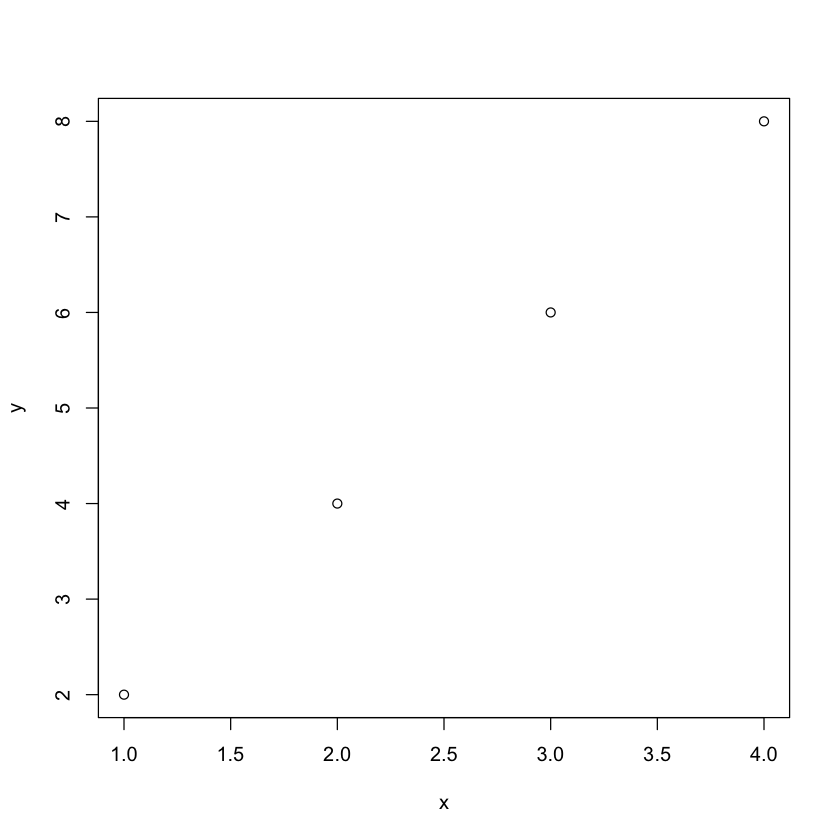

In [6]:
plot(x, y)

In [6]:
?tepBADA.inference.battery